In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/algonacci/Data-Warehouse/main/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

C:\Users\Vulcan\AppData\Local\Temp/ipykernel_9632/2500067087.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [2]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

Training Accuracy : 0.8803730738037308
Testing Accuracy : 0.8848337388483374


In [8]:
# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)


Confusion matrix
[[2027   57]
 [ 227  155]]


In [9]:
# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Classification report
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2084
        True       0.73      0.41      0.52       382

    accuracy                           0.88      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.88      0.87      2466



In [10]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8661800486618005


In [11]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/algonacci/Data-Warehouse/main/HousingBoston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

In [12]:
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (489, 3)
Shape of y: (489,)


In [13]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 36)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


In [14]:
##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression 
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error   
import numpy as np
import matplotlib.pyplot as plt 
#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

Mean squared error of testing set: 0.00997144561791792
Mean absolute error of testing set: 0.07535999511736192
Root Mean Squared Error of testing set: 0.09985712602472555


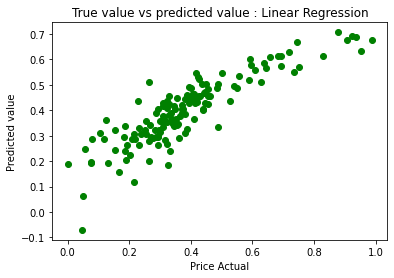

In [16]:
#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()